In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [104]:
folder_path = "energy-data"

cn = pd.read_csv(folder_path + "/cn_mili_joules.csv")
human = pd.read_csv(folder_path + "/human_mili_joules.csv")
sr = pd.read_csv(folder_path + "/sr_mili_joules.csv")
ts = pd.read_csv(folder_path + "/ts_mili_joules.csv")

In [105]:
cn = cn.rename(columns={cn.columns[0]: "name"})
human = human.rename(columns={human.columns[0]: "name"})
sr = sr.rename(columns={sr.columns[0]: "name"})
ts = ts.rename(columns={ts.columns[0]: "name"})

llama = pd.concat([cn, sr, ts], ignore_index=True)

In [106]:
for index, row in llama.iterrows():
    name = row['name'].split('-')
    llama.at[index, 'algorithm'] = name[0]
    if name[1] == 'E':
        llama.at[index, 'efficient'] = True
        llama.at[index, 'language'] = name[2]
        llama.at[index, 'temperature'] = name[3]
    else: 
        llama.at[index, 'efficient'] = False
        llama.at[index, 'language'] = name[1]
        llama.at[index, 'temperature'] = name[2]

for index, row in human.iterrows():
    name = row['name'].split('-')
    human.at[index, 'algorithm'] = name[0]
    human.at[index, 'language'] = name[2] 

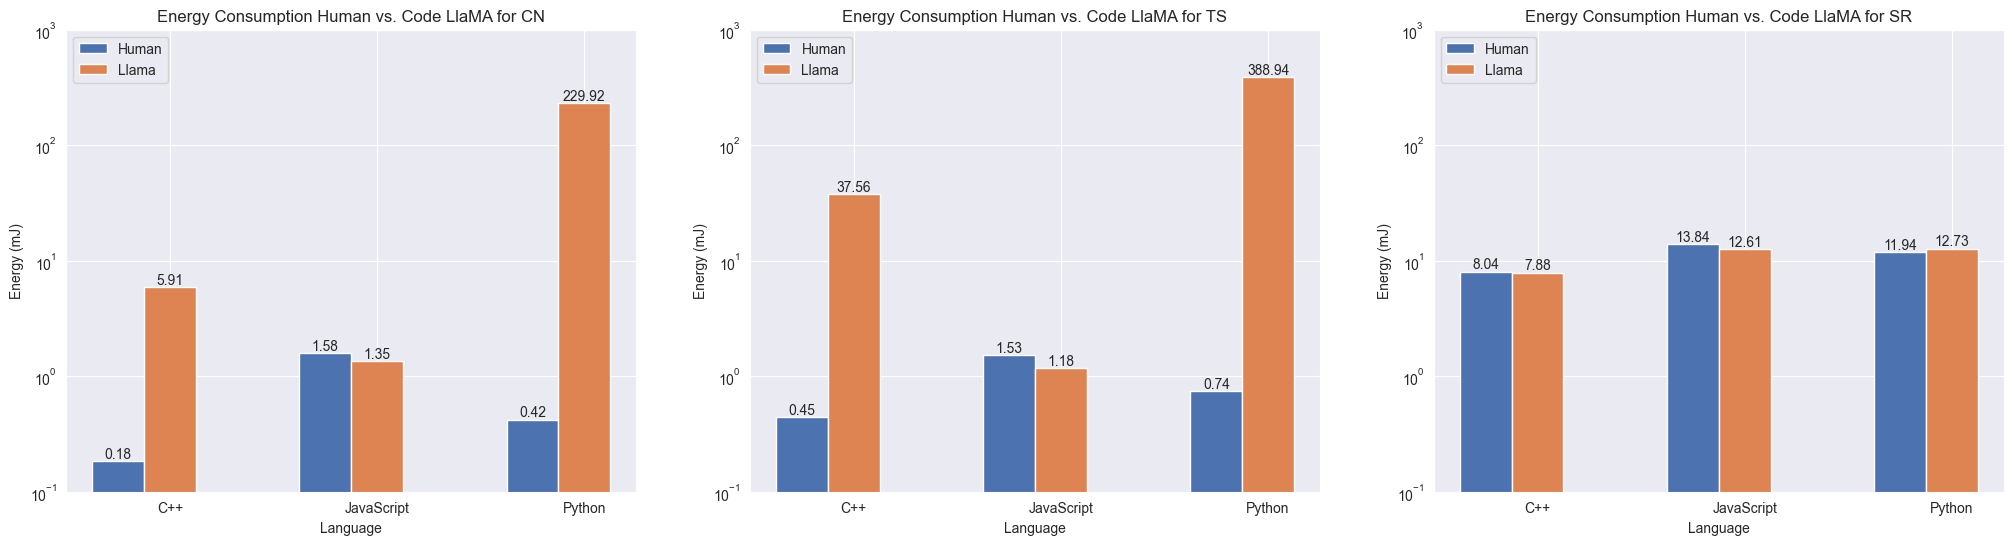

In [107]:
def group_and_calculate_mean(df, group_cols, mean_col):
    grouped_df = df.groupby(group_cols)
    result = grouped_df[mean_col].mean().reset_index()
    return result

non_efficient = llama[llama['efficient'] == False]

result = group_and_calculate_mean(non_efficient, ['algorithm', 'language'], 'mean')

human = human.rename(columns={'mean': 'human_mean'})
result = result.rename(columns={'mean': 'llama_mean'})
human_llama = pd.merge(human, result, on=['algorithm', 'language'])

cn = human_llama[human_llama['algorithm'] == 'CN']
sr = human_llama[human_llama['algorithm'] == 'SR']
ts = human_llama[human_llama['algorithm'] == 'TS']


def plot_benchmarks(df, title, subplot_position):
    plt.subplot(1, 3, subplot_position)  
    barWidth = 0.25
    r1 = np.arange(len(df['language']))
    r2 = [x + barWidth for x in r1]

    plt.bar(r1, df['human_mean'], width=barWidth, label='Human')
    plt.bar(r2, df['llama_mean'], width=barWidth, label='Llama')

    plt.xticks([r + barWidth for r in range(len(df['language']))], df['language'])
    plt.xlabel('Language')
    plt.ylabel('Energy (mJ)')
    plt.title(title)
    plt.yscale('log')
    plt.ylim(0.1, 1000)  
    plt.legend(loc='upper left')
    for i, v in enumerate(df['human_mean']):
        plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
    for i, v in enumerate(df['llama_mean']):
        plt.text(i + 0.25, v, str(round(v, 2)), ha='center', va='bottom')

plt.figure(figsize=(25, 6))  
plot_benchmarks(cn, 'Energy Consumption Human vs. Code LlaMA for CN', 1)
plot_benchmarks(ts, 'Energy Consumption Human vs. Code LlaMA for TS', 2)
plot_benchmarks(sr, 'Energy Consumption Human vs. Code LlaMA for SR', 3)
plt.show()

In [108]:
cn = non_efficient[non_efficient['algorithm'] == 'CN']
sr = non_efficient[non_efficient['algorithm'] == 'SR']
ts = non_efficient[non_efficient['algorithm'] == 'TS']

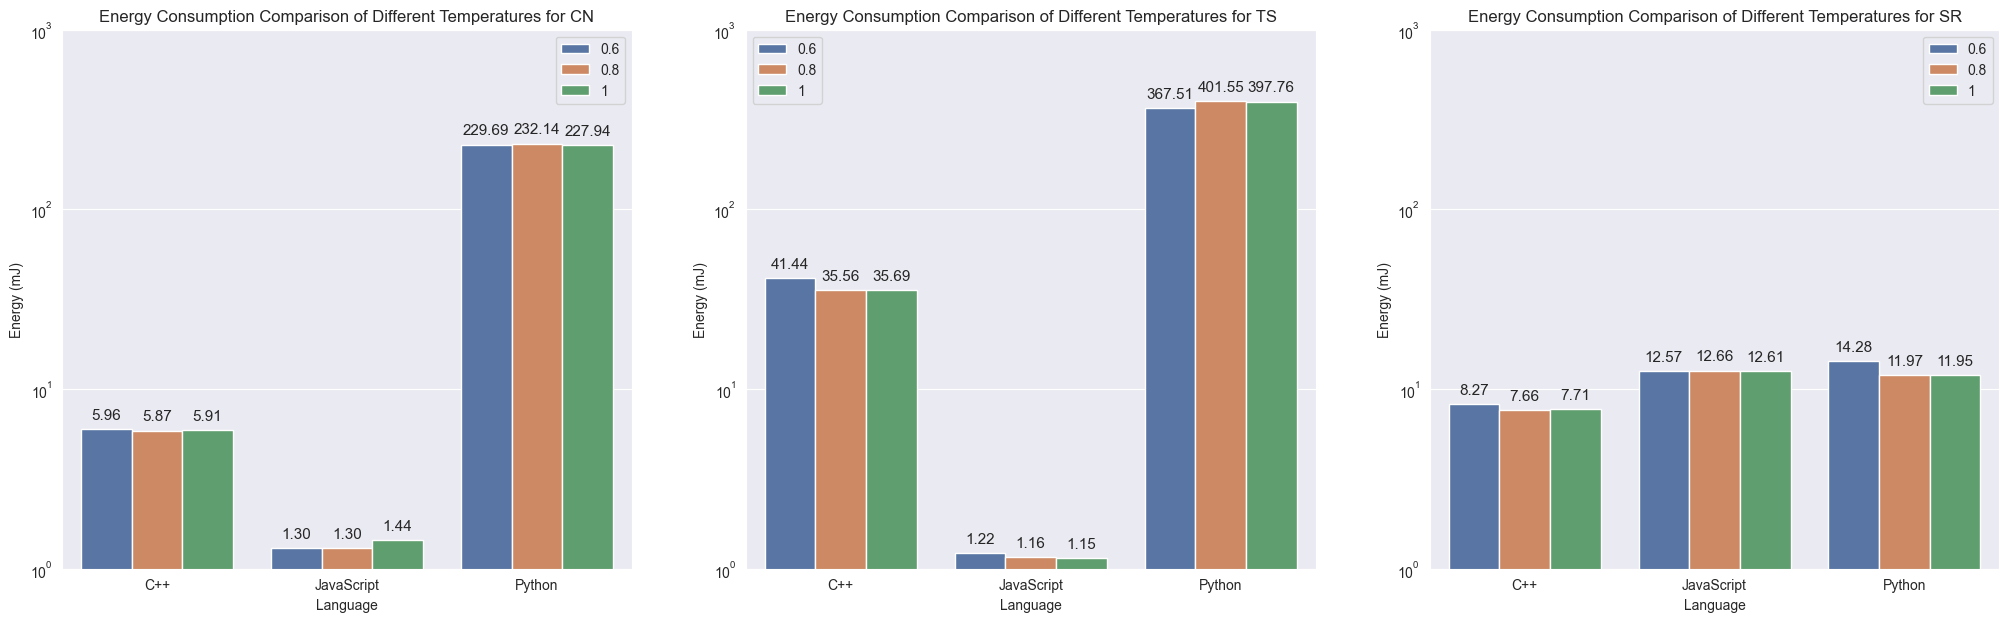

In [109]:
sns.set_style("darkgrid")
plt.rcParams['font.family'] = 'Arial'
sns.set_palette("deep")

def plot_benchmarks_hue(df, title, ax):
    order = ['C++', 'JavaScript', 'Python']  
    sns.barplot(x='language', y='mean', hue='temperature', data=df, ax=ax, order=order)
    ax.set_xlabel('Language')
    ax.set_ylabel('Energy (mJ)')
    ax.set_title(title)
    ax.set_yscale('log')
    ax.set_ylim(1, 1000)  
    ax.legend()

    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', fontsize=11, xytext=(0, 10),
                           textcoords='offset points')  

fig, axs = plt.subplots(1, 3, figsize=(25, 7))

plot_benchmarks_hue(cn, 'Energy Consumption Comparison of Different Temperatures for CN', axs[0])
plot_benchmarks_hue(ts, 'Energy Consumption Comparison of Different Temperatures for TS', axs[1])
plot_benchmarks_hue(sr, 'Energy Consumption Comparison of Different Temperatures for SR', axs[2])

plt.show()
